In [1]:
%load_ext autoreload
%autoreload 2
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
import matplotlib.pyplot as plt
import csv
import datetime
import seaborn as sns

#ANOVA TEST
# mod = ols('natural_gas~seasons',data=NY_data).fit()
# anova = sm.stats.anova_lm(mod, type=2)
# anova

# #multiple comparisions with tukey
# print(pairwise_tukeyhsd(NY_data['natural_gas'], NY_data['seasons']))

In [2]:
from Energy_Gen_Data import * 

In [3]:
states, ca, fla, ne, ny = get_data()

                     Date  COL     NG   WAT  OTH  OIL    SUN   WND   NUC  \
0     2019-10-02 00:00:00   18  13166  1278   -7   -1    534  1475  1140   
1     2019-10-01 23:00:00   16  12979  1277   -7   -2    534  1475  1142   
2     2019-10-01 22:00:00   14  12168  1267  -17   -2    533  1475  1142   
3     2019-10-01 21:00:00   14  11952  1409    1   -2    533  1475  1138   
4     2019-10-01 20:00:00   12  11791  1182  -53   -2    604  1475  1137   
5     2019-10-01 19:00:00   14   2908  1526    7   -2   9477  1475  1136   
6     2019-10-01 18:00:00   14   3294  2536   19   -2   9457  1475  1136   
7     2019-10-01 17:00:00   14   4316  3462   -7   -2   9248  1475  1138   
8     2019-10-01 16:00:00   14   4947  3372    5   -2   9121  1641  1136   
9     2019-10-01 15:00:00   15   4608  2952   20   -2   9990  1742  1138   
10    2019-10-01 14:00:00   15   4782  2526   -6   -2   9880  1914  1138   
11    2019-10-01 13:00:00   13   5099  2387   47   -2   9857  2322  1139   
12    2019-1

                     Date  COL     NG   WAT   OTH   OIL  SUN   WND   NUC  \
0     2019-10-02 00:00:00    0   4012  3088   191   922    0   765  5211   
1     2019-10-01 23:00:00    0   5043  3059   190   974    0   847  5238   
2     2019-10-01 22:00:00    0   6250  3179   190   979    0  1105  5253   
3     2019-10-01 21:00:00    0   7106  3409   190   977    0  1250  5240   
4     2019-10-01 20:00:00    0   7455  3531   191   977    0  1183  5235   
5     2019-10-01 19:00:00    0   7513  3428   188   975    0   952  5222   
6     2019-10-01 18:00:00    0   7504  3204   193   972    0  1121  5235   
7     2019-10-01 17:00:00    0   7414  3357   198   975    0  1083  5257   
8     2019-10-01 16:00:00    0   6950  3597   205   980    0   955  5283   
9     2019-10-01 15:00:00    0   6600  3406   213   980    0   832  5270   
10    2019-10-01 14:00:00    0   6248  3288   220   987    0   628  5275   
11    2019-10-01 13:00:00    0   6078  3006   210   987    0   620  5235   
12    2019-1

In [46]:
#TOT New England
print(pairwise_tukeyhsd(ne['TOT'], ne['season']))
#TOT California
print(pairwise_tukeyhsd(ca['TOT'], ca['season']))
#TOT New York
print(pairwise_tukeyhsd(ny['TOT'], ny['season']))
#TOT Florida
print(pairwise_tukeyhsd(fla['TOT'], fla['season']))

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
  fall spring  -487.6847 0.001  -672.0204   -303.349   True
  fall summer   2428.263 0.001  2266.4768  2590.0493   True
  fall winter   810.9433 0.001   625.4673   996.4194   True
spring summer  2915.9477 0.001  2740.0011  3091.8943   True
spring winter   1298.628 0.001  1100.6791   1496.577   True
summer winter -1617.3197 0.001 -1794.4606 -1440.1787   True
-----------------------------------------------------------
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
  fall spring -1517.7277 0.001  -1842.066 -1193.3894   True
  fall summer  3744.0518 0.001  3459.7014  4028.4023   True
  fall winter -2397.4364 0.001 -2726.2727 -2068.6001   True
spring summer  5261.7795 0.001  4952.406

In [45]:
# ANOVA TEST
mod = ols('TOT~season',data=ne).fit()
anova = sm.stats.anova_lm(mod, type=2)
anova

,df,sum_sq,mean_sq,F,PR(>F)
season,3.0,1.526492e+10,5.088305e+09,785.346841,0.0
Residual,10988.0,7.119186e+10,6.479055e+06,NaN,NaN


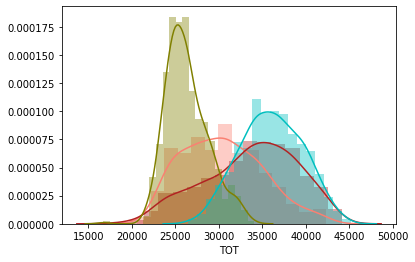

In [34]:
# colors=blues
# season=summer
state='FLA'
# time=day
db=fla
fuel='TOT'
sns.distplot(db[fuel].loc[((db.TOD=='evening')&(db.season=='spring'))], color='salmon')

# colors=greens
# season=winter
state='FLA'
# time=day
db=fla
fuel='TOT'
sns.distplot(db[fuel].loc[((db.TOD=='evening')&(db.season=='fall'))], color='firebrick')

# colors=greens
# season=winter
state='FLA'
# time=day
db=fla
fuel='TOT'
sns.distplot(db[fuel].loc[((db.TOD=='evening')&(db.season=='winter'))], color='olive')

# colors=greens
# season=winter
state='FLA'
# time=day
db=fla
fuel='TOT'
sns.distplot(db[fuel].loc[((db.TOD=='evening')&(db.season=='summer'))], color='c')

# plt.xlabel(f'New York {season[3]} {time[3]} Energy Generation (MWh)')
# plt.legend()

In [35]:
fla

,Date,COL,NG,WAT,OTH,NUC,OIL,SUN,TOT,months,hour,TOD,season
0,2019-10-02 00:00:00,1978,17474,14,2257,3804,0,0,25527,10,0,night,fall
1,2019-10-01 23:00:00,2092,19917,13,2304,3805,1,0,28132,10,23,night,fall
2,2019-10-01 22:00:00,2109,22559,11,2484,3800,0,0,30963,10,22,evening,fall
3,2019-10-01 21:00:00,2146,24599,11,2594,3800,0,0,33150,10,21,evening,fall
4,2019-10-01 20:00:00,2075,25943,11,2664,3801,0,1,34495,10,20,evening,fall
5,2019-10-01 19:00:00,2082,26318,10,2621,3797,0,213,35041,10,19,evening,fall
6,2019-10-01 18:00:00,2144,26983,10,2658,3801,36,684,36316,10,18,evening,fall
7,2019-10-01 17:00:00,2176,27159,10,2671,3794,0,984,36794,10,17,evening,fall
8,2019-10-01 16:00:00,2168,26491,10,2663,3797,0,1235,36364,10,16,day,fall
9,2019-10-01 15:00:00,2127,26375,10,2652,3799,0,1252,36215,10,15,day,fall
